# Prosodic and Bruce Hayes' annotations of Shakespeare and Milton

In [1]:
import sys,os
sys.path.insert(0,os.path.abspath('../prosodic'))
sys.path.insert(0,os.path.abspath('../cadence'))
import cadence as cd
from cadence.imports import *
import plotnine as p9
import prosodic as p
p.config['print_to_screen']=0
SCORECOL_HAYES='Score (Author A bottom-up coding)'

## Gathering data

### Hayes' data

In [2]:
@cache
def read_hayes_df():
    return pd.read_csv(
        'https://linguistics.ucla.edu/people/hayes/ShakespeareAndMilton/ShakespeareTableaux.txt',
        sep='\t', 
        header=7
    )

read_hayes_df()

,Sonnet,Line Number,Line,Computer coding,Score (Author A bottom-up coding),Stated in features for computer code,"*[+Strong,-J2]","*[+Strong,-J3]","*[+Strong,-J4]","*[+Strong,-J5]",*[-J5][+wb],*[-J4][+wb],*[-J3][+wb],*[-J2][+wb],"*[-Strong,+J5][]","*[-Strong,+J4][]","*[-Strong,+J3][]","*[-Strong,+J2][]","*[+J5,+Realsyl][]","*[+J4,+Realsyl][]","*[+J3,+Realsyl][]","*[+J2,+Realsyl][]",*[-Realsyl][+J5],*[-Realsyl][+J4],*[-Realsyl][+J3],*[-Realsyl][+J2],*[+J5][][+wb],*[+J4][][+wb],*[+J3][][+wb],*[+J2][][+wb],"*[-Strong,+Accent]","*[+Strong,-Accent]","*[+Strong,+Rise]","*[-Strong,+Fall]","*[+Strong,-Fall][]","*[-Strong,-Rise][]","*[-Accent][-Strong,+Accent]","*[-Strong,+Accent][-Accent]","*[+Strong,+Rise,-J2]","*[-Strong,+Accent,-J2]",...,"*[+Strong,+Rise,-J5][+Fall,-J5]","*[+Strong,+Rise,-J4][+Fall,-J4]","*[+Strong,+Rise,-J3][+Fall,-J3]","*[+Strong,+Rise,-J2][+Fall,-J2]","*[+Strong,-Accent][+Accent][-Accent]","*[+Strong,-Accent,-J5][+Accent,-J5][-Accent]","*[+Strong,-Accent,-J4][+Accent,-J4][-Accent]","*[+Strong,-Accent,-J3][+Accent,-J3][-Accent]","*[+Strong,+Rise,-J2][][-Accent]","*[-Accent][-Strong,+Accent,-J2]","*[+Strong,+Rise,-J2][-J5][-Accent]","*[-Accent,-J5][-Strong,+Accent,-J2]","*[+Strong,+Rise,-J2][-J4][-Accent]","*[-Accent,-J4][-Strong,+Accent,-J2]","*[+Strong,+Rise,-J2][-J3][-Accent]","*[-Accent,-J3][-Strong,+Accent,-J2]","*[+Strong,-Accent][][+Strong,-Accent]",*[-Strong][+wb],*[-Fall][-Strong][+wb],"*[-Strong,+Accent][+wb]",*[+J2][-Strong][+wb],"*[-Strong,-J5][+wb]","*[-Strong,-J4][+wb]","*[-J5][-Strong,+Accent,-J2]","*[-J4][-Strong,+Accent,-J2]","*[-J3][-Strong,+Accent,-J2]","*[-J5][-Strong,+Fall,-J3]","*[-J4][-Strong,+Fall,-J3]","*[-J5][-Strong,+Fall]","*[-J4][-Strong,+Fall]","*[-J3][-Strong,+Fall]","*[+Realsyl][-Strong,+Accent,-J2]","*[+Realsyl][-Strong,+Fall]","*[+Strong,+Accent,-J4][+Fall,-J2]","*[+Strong,+Accent,-J4][+Fall,-J3]","*[+J3][-Accent,+J3]","*[+J4][-Accent,+J4]","*[+J5][-Accent,+J5]","*[-Accent,-J2][-Accent,-J2][-Accent]","*[+J2][-Accent,-J2][-Accent,-J2]"
0,1,1,"From fairest creatures we desire increase,",LB5 MwUuJ2 MsSdJ1 MwUuJ3 MsSdJ1 MwUlJ3 MsUlJ2 ...,0.28,NaN,2.0,3.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3,NaN,NaN,3,5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,"That thereby beauty's rose might never die,",LB5 MwUuJ2 MsSdJ2 MwSuJ3 MsSdJ1 MwUuJ4 MsSdJ4 ...,3.73,NaN,2.0,3.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,1.0,3.0,5,NaN,2.0,4,7,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,"But as the riper should by time decease,",LB5 MwUlJ2 MsUlJ2 MwUuJ2 MsSdJ1 MwUlJ4 MsUlJ2 ...,1.35,NaN,1.0,3.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,4,NaN,2.0,2,7,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,His tender heir might bear his memory:,LB5 MwUuJ2 MsSdJ1 MwUuJ3 MsSdJ4 MwUuJ2 MsSdJ3 ...,1.87,NaN,2.0,2.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4,NaN,1.0,3,6,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,"But thou contracted to thine own bright eyes,",LB5 MwUlJ2 MsUlJ2 MwUuJ1 MsSdJ1 MwUlJ3 MsUlJ2 ...,3.78,NaN,1.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4,NaN,NaN,2,7,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,3.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### Data parsed via 'stanza'

In [3]:

def getparses(fn='data.parsed.shakespeare.pkl',scorecol=SCORECOL_HAYES):
    if not os.path.exists(fn):
        df = read_hayes_df()
        print(df.columns)
        txt='\n'.join(df.Line)
        t = cd.Verse(txt)
        dfparses = t.parse(verbose=False, num_proc=8)    
        dfl = to_lines(dfparses, only_best=False)
        dfl.to_pickle(fn)
    else:
        dfl=pd.read_pickle(fn)

    df = read_hayes_df()
    dfl['hayes_score'] = [df.iloc[i-1][scorecol] for i in dfl.index.get_level_values('unit_i')]
    return dfl

getparses()

*total  ...  hayes_score
unit_i parse_rank parse       parse_str                                               ...             
1      1          wSwSwSwSwS  𝖥𝗋𝗈𝗆 𝗳𝗮𝗶𝗋𝖾𝗌𝗍 𝗰𝗿𝗲𝗮𝗍𝗎𝗋𝖾𝗌 𝘄𝗲 𝖽𝖾𝘀𝗶𝗿𝗲 𝗂𝗇𝗰𝗿𝗲𝗮𝘀𝗲,         0.0  ...         0.28
2      1          wSwSwSwSwS  𝖳𝗁𝖺𝗍 𝘁𝗵𝗲𝘳𝘦𝘣𝘺 𝗯𝗲𝗮𝗎𝗍𝗒'𝗌 𝗿𝗼𝘀𝗲 𝗆𝗂𝗀𝗁𝗍 𝗻𝗲𝗏𝖾𝗋 𝗱𝗶𝗲,        1.0  ...         3.73
3      1          wSwSwSwSwS  𝖡𝗎𝗍 𝙖𝙨 𝗍𝗁𝖾 𝗿𝗶𝗉𝖾𝗋 𝘀𝗵𝗼𝘂𝗹𝗱 𝖻𝗒 𝘁𝗶𝗺𝗲 𝖽𝖾𝗰𝗲𝗮𝘀𝗲,           1.0  ...         1.35
       2          SwwSwSwSwS  𝘽𝙪𝙩 𝖺𝗌 𝗍𝗁𝖾 𝗿𝗶𝗉𝖾𝗋 𝘀𝗵𝗼𝘂𝗹𝗱 𝖻𝗒 𝘁𝗶𝗺𝗲 𝖽𝖾𝗰𝗲𝗮𝘀𝗲,           1.0  ...         1.35
4      1          wSwSwSwSSw  𝖧𝗂𝗌 𝘁𝗲𝗻𝖽𝖾𝗋 𝗵𝗲𝗶𝗿 𝗆𝗂𝗀𝗁𝗍 𝗯𝗲𝗮𝗿 𝗁𝗂𝗌 𝗺𝗲𝙢𝙤𝗋𝗒:             1.0  ...         1.87
...                                                                              ...  ...          ...
2140   2          SwwSwwSwwS  𝗖𝗮𝗺𝗲 𝗍𝗁𝖾𝗋𝖾 𝖿𝗈𝗋 𝗰𝘂𝗿𝗲 𝖺𝗇𝖽 𝗍𝗁𝗂𝗌 𝙗𝙮 𝗍𝗁𝖺𝗍 𝖨 𝗽𝗿𝗼𝘃𝗲,      1.0  ...         4.46
2141   1          wSwSSwSwSwS 𝘓𝘰𝘷𝘦'𝘴 𝗳𝗶𝗋𝖾 𝗵𝗲𝗮𝘁𝘀 𝙬𝙖𝗍𝖾𝗋, 𝘄𝗮𝗍𝖾𝗋 𝗰𝗼𝗼𝗹𝘀 𝗇𝗈𝗍 𝗹𝗼𝘃𝗲.     2.0  ...        10.68
       2          wSwSwSwSwS  𝘓𝘰𝘷𝘦'𝘴 𝗳𝗶𝗿𝗲 𝘩𝘦𝘢𝘵𝘴 𝘄𝗮𝗍𝖾𝗋, 𝘄𝗮𝗍𝖾𝗋 𝗰𝗼𝗼𝗹𝘀 𝗇𝗈𝗍 𝗹𝗼𝘃𝗲.     2.0  ...        10.68
       3          SSwSSwSwSwS 𝗟𝗼𝘃𝗲'𝘀 𝙛𝙞𝗋𝖾 𝗵𝗲𝗮𝘁𝘀 𝙬𝙖𝗍𝖾𝗋, 𝘄𝗮𝗍𝖾𝗋 𝗰𝗼𝗼𝗹𝘀 𝗇𝗈𝗍 𝗹𝗼𝘃𝗲.     2.0  ...        10.68
       4          SSwSwSwSwS  𝗟𝗼𝘃𝗲'𝘀 𝙛𝙞𝙧𝙚 𝘩𝘦𝘢𝘵𝘴 𝘄𝗮𝗍𝖾𝗋, 𝘄𝗮𝗍𝖾𝗋 𝗰𝗼𝗼𝗹𝘀 𝗇𝗈𝗍 𝗹𝗼𝘃𝗲.     2.0  ...        10.68

[6189 rows x 8 columns]

In [4]:
def getparses_stats():
    dfl = getparses()
    dflq = dfl.groupby('unit_i').mean()
    return dflq

getparses_stats()

,*total,*s_unstressed,*unres_across,*unres_within,*w_peak,*w_stressed,num_parses,hayes_score
unit_i,,,,,,,,
1,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.28
2,1.00,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,3.73
3,1.00,1.000000,0.000000,0.000000,0.000000,0.000000,2.0,1.35
4,1.00,0.666667,0.000000,0.333333,0.000000,0.000000,3.0,1.87
5,2.75,1.500000,0.750000,0.250000,0.000000,0.250000,4.0,3.78
...,...,...,...,...,...,...,...,...
2137,3.20,0.866667,1.200000,0.333333,0.000000,0.800000,15.0,8.63
2138,3.00,1.333333,0.333333,0.666667,0.333333,0.333333,9.0,5.09
2139,1.00,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.83


#### Which best correlates?

In [5]:
getparses_stats().corr().hayes_score.sort_values(ascending=False)

hayes_score      1.000000
*w_stressed      0.422671
*total           0.351239
*unres_across    0.323188
num_parses       0.255213
*w_peak          0.129032
*unres_within    0.127973
*s_unstressed    0.044227
Name: hayes_score, dtype: float64

### Data parsed via Prosodic

In [6]:
def getparses_prosodic(fn='data.parsed.shakespeare.prosodic.pkl', force=False, meter='default_english', scorecol=SCORECOL_HAYES):
    if force or not os.path.exists(fn):
        df = read_hayes_df()
        txt='\n'.join(df.Line)
        t = p.Text(txt, phrasebreak='line', name='shakespeare_hayes')
        t.parse(meter=meter)
        for _ in t.stats(): pass
        ifn=os.path.join(p.dir_prosodic_home, 'results', 'stats', 'texts', t.name, f'{t.name}.lines_ot.meter={meter}.csv')
        dfl = pd.read_csv(ifn).fillna(method='ffill')
        dfl.to_pickle(fn)
    else:
        dfl=pd.read_pickle(fn)


    numparsed = {line:len(linedf) for line,linedf in dfl.groupby('line')}
    dfl['num_parses'] = [numparsed.get(line) for line in dfl.line]
    df = read_hayes_df()
    dfl['hayes_score'] = [df.iloc[i-1][scorecol] for i in dfl.num_line]
    return dfl

getparses_prosodic()



,line,parse,meter,num_viols,score_viols,[*strength.w=>-p],[*stress.s=>-u],[*stress.w=>-p],[*footmin-w-resolution],[*footmin-f-resolution],num_line,num_stanza,num_parses,hayes_score
0,"From fairest creatures we desire increase,",from|FAI|rest|CREA|tures|WE|de|SIRE|in|CREASE,wswswswsws,0,0,NaN,NaN,NaN,NaN,NaN,1,1,1,0.28
1,"That thereby beauty's rose might never die,",that|THE|reby*|BEA|uty's|ROSE|might|NE|ver|DIE,wswswswsws,1,1,NaN,NaN,1.0,NaN,NaN,2,1,1,3.73
2,"But as the riper should by time decease,",BUT*|as.the|RI|per|SHOULD|by|TIME|de|CEASE,swwswswsws,1,1,NaN,1.0,1.0,NaN,NaN,3,1,2,1.35
3,"But as the riper should by time decease,",but|AS*|the|RI|per|SHOULD|by|TIME|de|CEASE,wswswswsws,1,1,NaN,1.0,1.0,NaN,NaN,3,1,2,1.35
4,His tender heir might bear his memory:,his|TEN|der|HEIR|might|BEAR|his|ME|mo|RY*,wswswswsws,1,1,NaN,1.0,1.0,NaN,NaN,4,1,3,1.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6001,"Love's fire heats water, water cools not love.",love's*|FI|re|HEATS.WA*|ter|WA|ter|COOLS|not|LOVE,wswsswswsws,2,2,1.0,1.0,1.0,1.0,1.0,2141,1,6,10.68
6002,"Love's fire heats water, water cools not love.",LOVE'S|fire*|HEATS.WA*|ter|WA|ter|COOLS|not|LOVE,swsswswsws,2,2,1.0,1.0,1.0,1.0,1.0,2141,1,6,10.68
6003,"Love's fire heats water, water cools not love.",LOVE'S|fire.heats*|WA|ter|WA|ter|COOLS|not|LOVE,swwswswsws,2,2,1.0,1.0,1.0,1.0,1.0,2141,1,6,10.68
6004,"Love's fire heats water, water cools not love.",LOVE'S.FIRE*|heats*|WA|ter|WA|ter|COOLS|not|LOVE,sswswswsws,2,2,1.0,1.0,1.0,1.0,1.0,2141,1,6,10.68


In [7]:
def getparses_stats_prosodic():
    dfl = getparses_prosodic()
    dflq = dfl.drop(['parse','meter'],axis=1).groupby('line').mean()
    return dflq

getparses_stats_prosodic()

,num_viols,score_viols,[*strength.w=>-p],[*stress.s=>-u],[*stress.w=>-p],[*footmin-w-resolution],[*footmin-f-resolution],num_line,num_stanza,num_parses,hayes_score
line,,,,,,,,,,,
"' Fair, kind, and true,' is all my argument,",2.000000,2.000000,1.0,1.00,1.0,1.000000,1.000000,1466.0,1.0,4.0,10.11
"' Fair, kind, and true,' varying to other words;",3.600000,3.600000,1.0,1.20,1.4,1.000000,1.200000,1467.0,1.0,5.0,10.80
"' Gainst death, and all-oblivious enmity",3.000000,3.000000,1.0,1.25,1.0,1.500000,1.000000,765.0,1.0,8.0,5.24
"' Had my friend's Muse grown with this growing age,",1.000000,1.000000,1.0,1.00,1.0,1.000000,1.000000,444.0,1.0,2.0,8.07
"' Since from thee going, he went wilful-slow,",1.666667,1.666667,1.0,1.00,1.0,1.000000,1.333333,713.0,1.0,3.0,5.43
...,...,...,...,...,...,...,...,...,...,...,...
Your own glass shows you when you look in it.,1.000000,1.000000,1.0,2.00,1.0,1.000000,1.000000,1443.0,1.0,4.0,7.71
"Your shallowest help will hold me up afloat,",2.000000,2.000000,1.0,1.50,1.0,1.000000,1.000000,1115.0,1.0,2.0,4.05
"Yourself again, after yourself's decease,",3.000000,3.000000,1.0,1.00,1.0,1.000000,1.500000,175.0,1.0,4.0,4.91


#### Which best correlates?

In [8]:
getparses_stats_prosodic().corr().hayes_score.sort_values(ascending=False)

hayes_score                1.000000
num_viols                  0.366977
score_viols                0.366977
num_parses                 0.264312
num_line                   0.053747
[*footmin-f-resolution]    0.051067
[*stress.w=>-p]            0.036420
[*stress.s=>-u]           -0.003735
[*footmin-w-resolution]   -0.016924
[*strength.w=>-p]         -0.049803
num_stanza                      NaN
Name: hayes_score, dtype: float64

## Figures of correlations (prosodic)

In [14]:
@cache
def getfigdf():
    dflq=getparses_stats_prosodic()
    figdf=dflq.sample(frac=1)
    for c in list(figdf.columns):
        try:
            cats=pd.qcut(figdf[c], 10, duplicates='drop')
            categories = cats.sort_values(ascending=False).drop_duplicates().tolist()
            figdf[f'{c}_bin']=pd.Categorical(cats, categories=categories, ordered=True)
        except Exception:
            pass
    return figdf

getfigdf()

,num_viols,score_viols,[*strength.w=>-p],[*stress.s=>-u],[*stress.w=>-p],[*footmin-w-resolution],[*footmin-f-resolution],num_line,num_stanza,num_parses,hayes_score,num_viols_bin,score_viols_bin,num_line_bin,num_parses_bin,hayes_score_bin
line,,,,,,,,,,,,,,,,
Disdains the tillage of thy husbandry?,2.000000,2.000000,2.0,1.500000,1.000000,1.0,1.000000,34.0,1.0,4.0,1.96,"(1.5, 2.0]","(1.5, 2.0]","(0.999, 215.0]","(3.0, 4.0]","(1.7, 3.08]"
"And often is his gold complexion dimm'd,",0.000000,0.000000,1.0,2.000000,4.000000,1.0,1.000000,244.0,1.0,1.0,0.88,"(-0.001, 1.0]","(-0.001, 1.0]","(215.0, 429.0]","(0.999, 2.0]","(0.47, 1.07]"
"At such who, not born fair, no beauty lack,",2.000000,2.000000,1.0,1.000000,1.142857,1.0,1.000000,1774.0,1.0,7.0,6.48,"(1.5, 2.0]","(1.5, 2.0]","(1713.0, 1927.0]","(6.0, 24.0]","(5.21, 6.63]"
"One will of mine, to make thy large will more.",1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1887.0,1.0,2.0,4.01,"(-0.001, 1.0]","(-0.001, 1.0]","(1713.0, 1927.0]","(0.999, 2.0]","(3.69, 4.46]"
"Awakes my heart, to heart's and eye's delight.",0.000000,0.000000,1.0,1.000000,2.000000,1.0,1.000000,658.0,1.0,1.0,1.23,"(-0.001, 1.0]","(-0.001, 1.0]","(643.0, 857.0]","(0.999, 2.0]","(1.07, 1.7]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Hang on such thorns, and play as wantonly",1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,749.0,1.0,2.0,9.13,"(-0.001, 1.0]","(-0.001, 1.0]","(643.0, 857.0]","(0.999, 2.0]","(8.34, 23.85]"
"And by addition me of thee defeated,",3.600000,3.600000,1.0,2.400000,1.000000,1.0,2.000000,277.0,1.0,5.0,3.87,"(2.857, 5.824]","(2.857, 5.824]","(215.0, 429.0]","(4.0, 6.0]","(3.69, 4.46]"
Loving offenders thus I will excuse ye:,2.333333,2.333333,1.0,1.666667,1.000000,1.0,1.666667,579.0,1.0,3.0,9.14,"(2.0, 2.857]","(2.0, 2.857]","(429.0, 643.0]","(2.0, 3.0]","(8.34, 23.85]"


In [22]:
def plot(x='hayes_score_bin', y='num_parses'):
    return (
        p9.ggplot(getfigdf(), p9.aes(x=x, y=y)) 
        + p9.geom_boxplot(outlier_size=.5, outlier_alpha=.5) 
        + p9.geom_jitter(size=.5, alpha=.1) 
        + p9.coord_flip()
    )

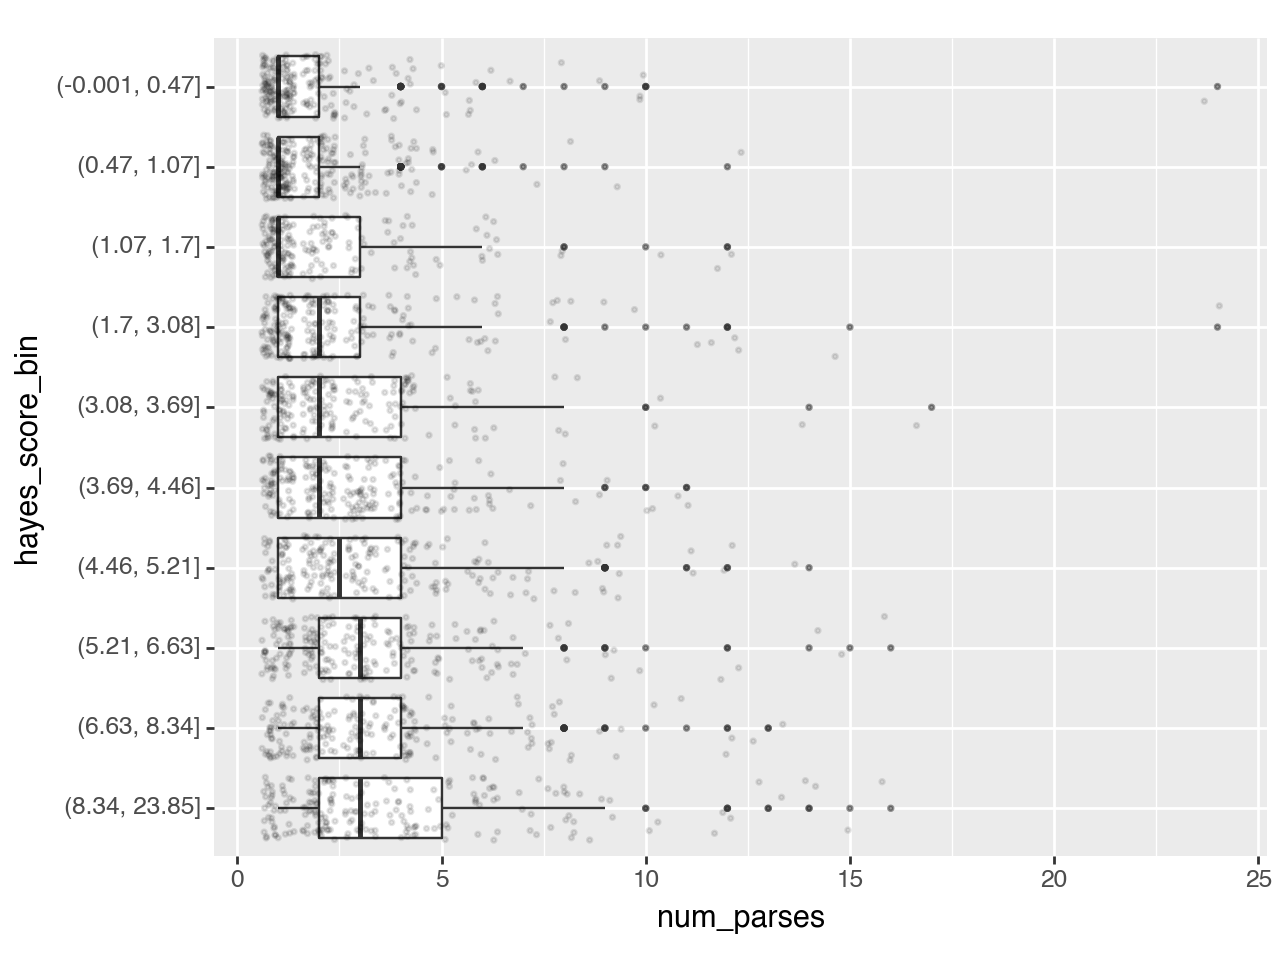

<Figure Size: (640 x 480)>

In [23]:
plot('hayes_score_bin', 'num_parses')

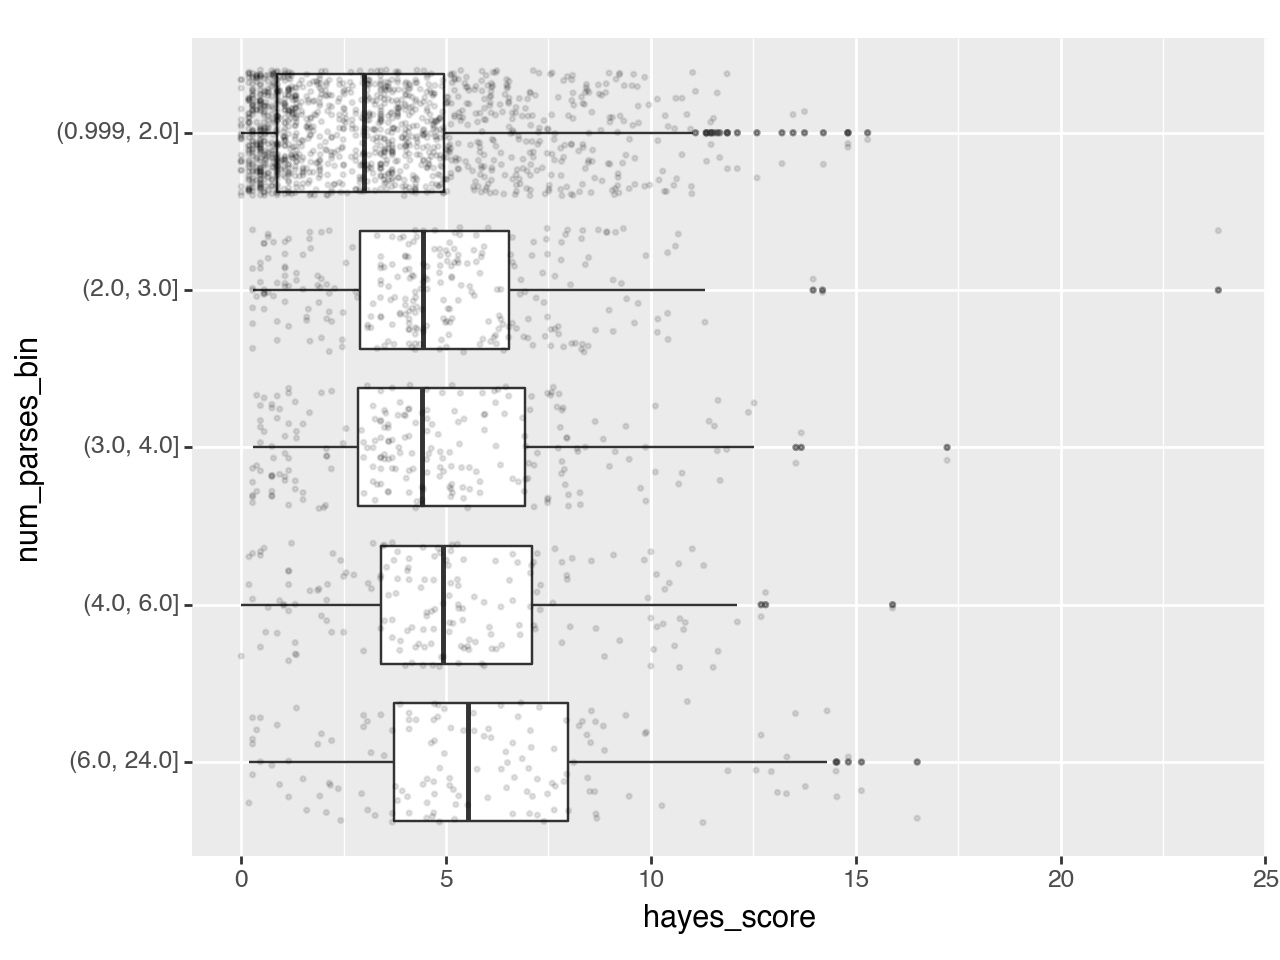

<Figure Size: (640 x 480)>

In [24]:
plot('num_parses_bin', 'hayes_score')

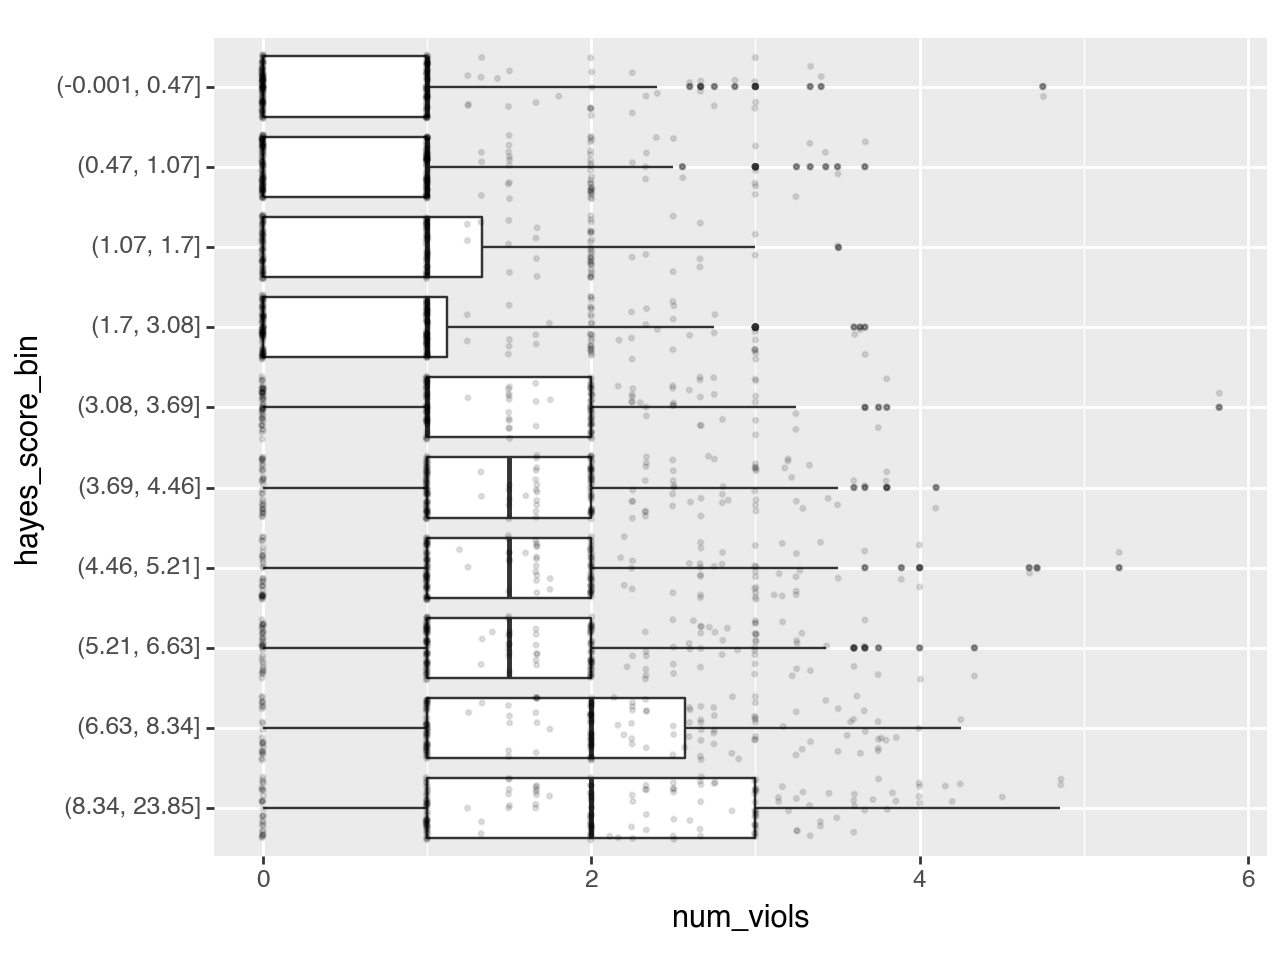

<Figure Size: (640 x 480)>

In [27]:
plot('hayes_score_bin', 'num_viols')

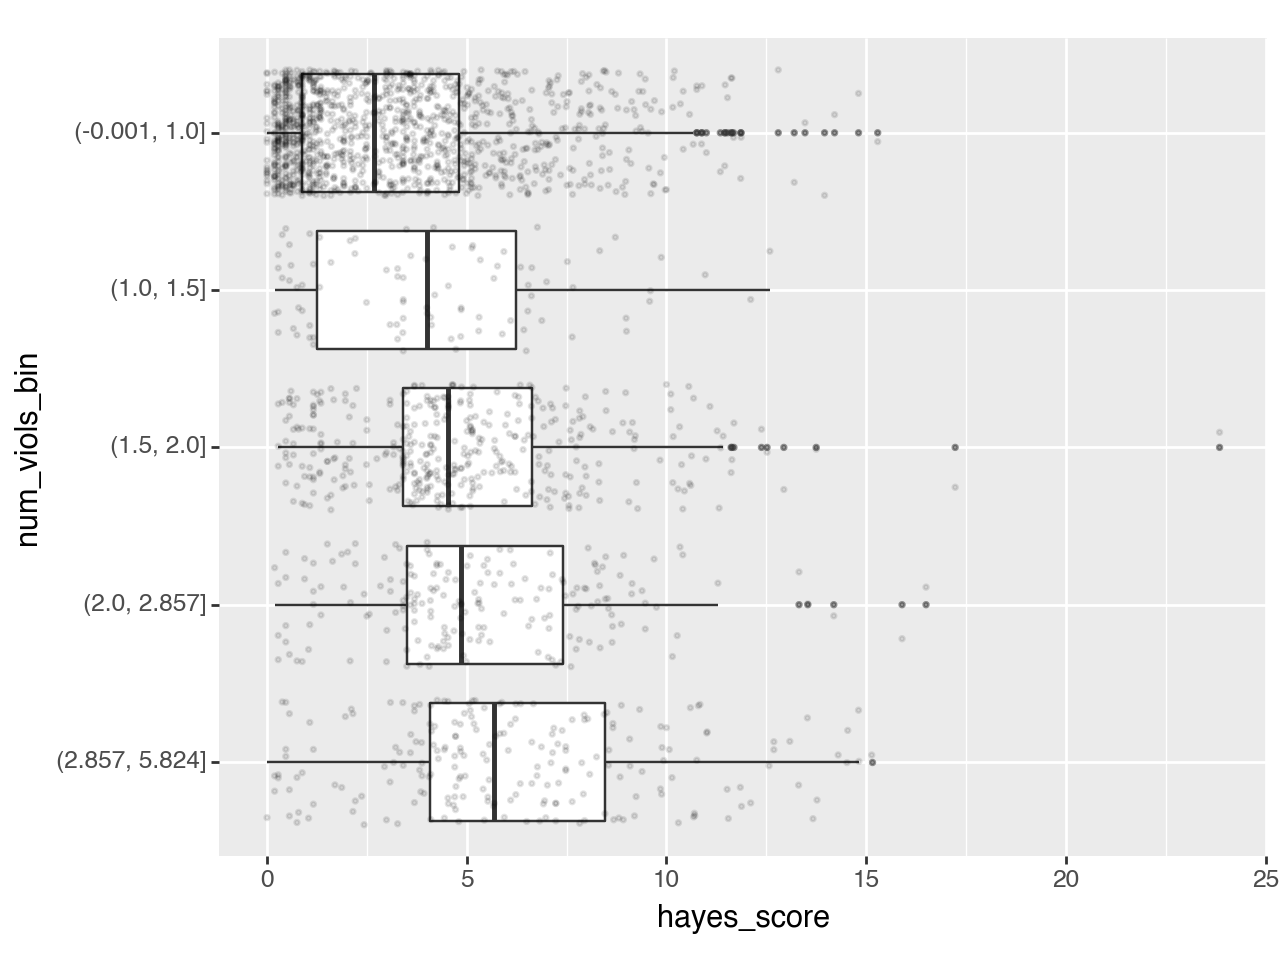

<Figure Size: (640 x 480)>

In [28]:
plot('num_viols_bin', 'hayes_score')